In [2]:
# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# import functions from scripts
from scripts import times_model_ran, perform_grid_search, evaluate_predictions_plot

# import categorical data: 
from split_data import X_cat_train_scaled_std, X_cat_train_scaled_minmax, y_cat_train # train data
from split_data import X_cat_val_scaled_std, X_cat_val_scaled_minmax, y_cat_val # val data

# import non-categorical data:
from split_data import X_raw_train_scaled_std, X_raw_train_scaled_minmax, y_raw_train # train data
from split_data import X_raw_val_scaled_std, X_raw_val_scaled_minmax, y_raw_val # val data

# Setup for performing GridSearch

### Below param grid will be used for tuning all versions of data using Logistic Regression to ensure comparable results  

Versions are:  
- Categorical Dataset Standardized  
- Categorical Dataset Normalized  
- Non-Categorical Dataset Standardized  
- Non-Categorical Dataset Normalized

In [3]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'sag', 'lbfgs', 'saga', 'liblinear'],
    'max_iter': [1, 10, 25, 100],
    'fit_intercept': [True, False]
}

print(f"With the specified parameters, model will be fitted {times_model_ran(param_grid)} times")

With the specified parameters, model will be fitted 4000 times


# Tuning Parameters - Categorical Dataset - Standardized

## Iteration 1

Performing grid search based on param_grid

In [4]:
grid_search_cat_std = perform_grid_search(X_cat_train_scaled_std, y_cat_train, param_grid, LogisticRegression(random_state = 42))

c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Andre\.virtualenvs\diseas

In [5]:
grid_search_cat_std.best_params_ # best parameters found

{'C': 1,
 'fit_intercept': False,
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [6]:
grid_search_cat_std.best_score_ # recall

0.6808706726994065

# Tuning Parameters - Categorical Dataset - Normalized

## Iteration 1

Performing grid search based on param_grid

In [7]:
grid_search_cat_minmax = perform_grid_search(X_cat_train_scaled_minmax, y_cat_train, param_grid, LogisticRegression(random_state = 42))

c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Andre\.virtualenvs\diseas

In [8]:
grid_search_cat_minmax.best_params_ # best parameters found

{'C': 0.1,
 'fit_intercept': False,
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'sag'}

In [9]:
grid_search_cat_minmax.best_score_ # recall

0.7055266475479628

# Tuning Parameters - Non-Categorical Dataset - Standardized

## Iteration 1

Performing grid search based on param_grid

In [10]:
grid_search_raw_std = perform_grid_search(X_raw_train_scaled_std, y_raw_train, param_grid, LogisticRegression(random_state = 42))

c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Andre\.virtualenvs\diseas

In [11]:
grid_search_raw_std.best_params_ # best parameters found

{'C': 0.01,
 'fit_intercept': False,
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [12]:
grid_search_raw_std.best_score_ # recall

0.7101606806494075

# Tuning Parameters - Non-Categorical Dataset - Normalized

## Iteration 1

Performing grid search based on param_grid

In [13]:
grid_search_raw_minmax = perform_grid_search(X_raw_train_scaled_minmax, y_raw_train, param_grid, LogisticRegression(random_state = 42))

c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1800 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Andre\.virtualenvs\disease_prediction-YIxnrnW5\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Andre\.virtualenvs\diseas

In [14]:
grid_search_raw_minmax.best_params_ # best parameters found

{'C': 0.1,
 'fit_intercept': False,
 'max_iter': 1,
 'penalty': 'l2',
 'solver': 'sag'}

In [15]:
grid_search_raw_minmax.best_score_ # recall

0.7216530656347894

# Predictions on Validation Data

### Categorical

In [24]:
# standardized
grid_search_cat_std.best_estimator_.get_params() # get best parameters
y_cat_std_pred = grid_search_cat_std.predict(X_cat_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_cat_minmax.best_estimator_.get_params() # get best parameters
y_cat_minmax_pred = grid_search_cat_minmax.predict(X_cat_val_scaled_minmax) # make predictions on val based on them

### Non-Categorical

In [25]:
# standardized
grid_search_raw_std.best_estimator_.get_params() # get best parameters
y_raw_std_pred = grid_search_raw_std.predict(X_raw_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_raw_minmax.best_estimator_.get_params() # get best parameters
y_raw_minmax_pred = grid_search_raw_minmax.predict(X_raw_val_scaled_minmax) # make predictions on val based on them

# Evaluating Performance of Model Versions

### Categorical Standardized

In [18]:
print(classification_report(y_cat_val, y_cat_std_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      6874
           1       0.73      0.63      0.68      6646

    accuracy                           0.71     13520
   macro avg       0.71      0.71      0.70     13520
weighted avg       0.71      0.71      0.70     13520



### Categorical Normalized

In [19]:
print(classification_report(y_cat_val, y_cat_minmax_pred))

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      6874
           1       0.61      0.83      0.70      6646

    accuracy                           0.65     13520
   macro avg       0.67      0.65      0.64     13520
weighted avg       0.68      0.65      0.64     13520



### Non-Categorical Standardized

In [21]:
print(classification_report(y_raw_val, y_raw_std_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6874
           1       0.74      0.68      0.71      6646

    accuracy                           0.72     13520
   macro avg       0.73      0.72      0.72     13520
weighted avg       0.72      0.72      0.72     13520



### Non-Categorical Normalized

In [22]:
print(classification_report(y_raw_val, y_raw_minmax_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      6874
           1       0.69      0.76      0.72      6646

    accuracy                           0.71     13520
   macro avg       0.72      0.71      0.71     13520
weighted avg       0.72      0.71      0.71     13520



# Plotting Performance

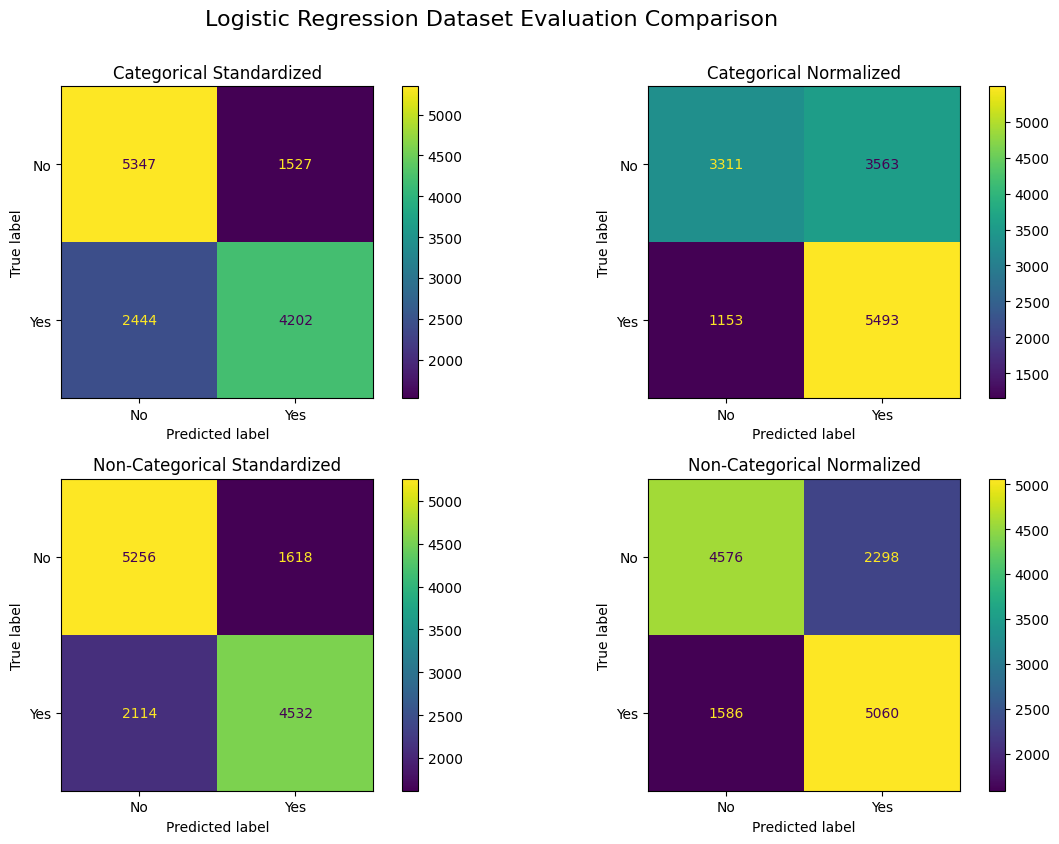

In [23]:
# variables to plot
ys = [y_cat_val, y_cat_val, y_raw_val, y_raw_val]
y_preds = [y_cat_std_pred, y_cat_minmax_pred, y_raw_std_pred, y_raw_minmax_pred]

# using evaluation plot function from scripts
evaluate_predictions_plot(ys, y_preds, "Logistic Regression Dataset Evaluation Comparison")